## IMAGE BINARIZATION FOR HANDWRITING OCR

v4 - EDA - Ross Kimberlin - 6/2/2022

(SEE https://github.com/ross-k/Image-Binarization-for-Handwriting-OCR/tree/ross-test/notebooks)

In [24]:
import cv2
import glob
import imageio as imi
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy import misc, ndimage
from scipy import misc, ndimage
from sklearn.metrics import accuracy_score, \
    classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

%matplotlib inline

## STEP 1) READ IMAGES INTO PYTHON AND INSPECT

### H-DIBCO DATA SET

In [2]:
read_dir_DIBCO_GT = '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/'

In [3]:
read_dir_DIBCO    = '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/'

In [4]:
DIBCO_GT = []
DIBCO_orig = []

for file in sorted(glob.glob(read_dir_DIBCO_GT + '*.bmp'),
       key = lambda x: int((x.split('GT/')[1]).split('_gt')[0])):

    # CHANGING TO GRAYSCALE
    DIBCO_GT.append(cv2.imread(file,
                               cv2.IMREAD_GRAYSCALE))
    
for file in sorted(glob.glob(read_dir_DIBCO + '*.bmp'),
       key = lambda x: int((x.split('_dataset/')[1]).split('.bmp')[0])):

    # CHANGING TO GRAYSCALE
    DIBCO_orig.append(cv2.imread(file,
                               cv2.IMREAD_GRAYSCALE))

In [5]:
sorted(glob.glob(read_dir_DIBCO_GT + '*.bmp'),
       key = lambda x: int((x.split('GT/')[1]).split('_gt')[0]))

['../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/1_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/2_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/3_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/4_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/5_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/6_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/7_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/8_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/9_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/10_gt.bmp']

In [6]:
sorted(glob.glob(read_dir_DIBCO + '*.bmp'),
       key = lambda x: int((x.split('_dataset/')[1]).split('.bmp')[0]))

['../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/1.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/2.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/3.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/4.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/5.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/6.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/7.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/8.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/9.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/10.bmp']

### BENTHAM DATA SET

In [7]:
read_dir_Ben_GT = '../data/Bentham/BenthamDatasetR0-GT/Images/Lines/'

In [8]:
read_dir_Ben    = '../data/Bentham/BenthamDatasetR0-Images/Images/Pages/'

In [9]:
Ben_GT = []
Ben_orig = []

for file in sorted(glob.glob(read_dir_Ben_GT + '*.png'),
       key = lambda x: int((x.split('Lines/')[1]).split('.png')[0])):
    
    # CHANGING TO GRAYSCALE
    Ben_GT.append(cv2.imread(file,
                             cv2.IMREAD_GRAYSCALE))
    
for file in sorted(glob.glob(read_dir_Ben + '*.jpg'),
       key = lambda x: int((x.split('Pages/')[1]).split('.jpg')[0])):

    # CHANGING TO GRAYSCALE
    Ben_orig.append(cv2.imread(file,
                               cv2.IMREAD_GRAYSCALE))

In [10]:
sorted(glob.glob(read_dir_Ben_GT + '*.png'),
       key = lambda x: int((x.split('Lines/')[1]).split('.png')[0]))

['../data/Bentham/BenthamDatasetR0-GT/Images/Lines/002_080_001_01_01.png',
 '../data/Bentham/BenthamDatasetR0-GT/Images/Lines/002_080_001_02_01.png',
 '../data/Bentham/BenthamDatasetR0-GT/Images/Lines/002_080_001_03_01.png',
 '../data/Bentham/BenthamDatasetR0-GT/Images/Lines/002_080_001_03_02.png',
 '../data/Bentham/BenthamDatasetR0-GT/Images/Lines/002_080_001_03_03.png',
 '../data/Bentham/BenthamDatasetR0-GT/Images/Lines/002_080_001_03_04.png',
 '../data/Bentham/BenthamDatasetR0-GT/Images/Lines/002_080_001_03_05.png',
 '../data/Bentham/BenthamDatasetR0-GT/Images/Lines/002_080_001_03_06.png',
 '../data/Bentham/BenthamDatasetR0-GT/Images/Lines/002_080_001_03_07.png',
 '../data/Bentham/BenthamDatasetR0-GT/Images/Lines/002_080_001_03_08.png',
 '../data/Bentham/BenthamDatasetR0-GT/Images/Lines/002_080_001_03_09.png',
 '../data/Bentham/BenthamDatasetR0-GT/Images/Lines/002_080_001_03_10.png',
 '../data/Bentham/BenthamDatasetR0-GT/Images/Lines/002_080_001_03_11.png',
 '../data/Bentham/Bentham

In [11]:
sorted(glob.glob(read_dir_Ben + '*.jpg'),
       key = lambda x: int((x.split('Pages/')[1]).split('.jpg')[0]))

['../data/Bentham/BenthamDatasetR0-Images/Images/Pages/002_080_001.jpg',
 '../data/Bentham/BenthamDatasetR0-Images/Images/Pages/002_112_001.jpg',
 '../data/Bentham/BenthamDatasetR0-Images/Images/Pages/002_121_001.jpg',
 '../data/Bentham/BenthamDatasetR0-Images/Images/Pages/002_541_001.jpg',
 '../data/Bentham/BenthamDatasetR0-Images/Images/Pages/002_579_001.jpg',
 '../data/Bentham/BenthamDatasetR0-Images/Images/Pages/027_029_001.jpg',
 '../data/Bentham/BenthamDatasetR0-Images/Images/Pages/035_320_001.jpg',
 '../data/Bentham/BenthamDatasetR0-Images/Images/Pages/035_321_001.jpg',
 '../data/Bentham/BenthamDatasetR0-Images/Images/Pages/035_322_001.jpg',
 '../data/Bentham/BenthamDatasetR0-Images/Images/Pages/035_323_001.jpg',
 '../data/Bentham/BenthamDatasetR0-Images/Images/Pages/035_324_001.jpg',
 '../data/Bentham/BenthamDatasetR0-Images/Images/Pages/035_325_001.jpg',
 '../data/Bentham/BenthamDatasetR0-Images/Images/Pages/035_327_001.jpg',
 '../data/Bentham/BenthamDatasetR0-Images/Images/Pa

### READ_ABP DATA SET - TO DO - DECIDE WHICH IS GT! **

In [ ]:
read_dir_ABP_GT = '../data/Bentham/BenthamDatasetR0-GT/Images/Lines/'

In [ ]:
read_dir_ABP    = 

In [ ]:
for thing in place

In [ ]:
sorted

In [ ]:
sorted

### cBAD DATA SET (TO DO - WHICH ONE IS GT? **)

In [ ]:
read_dir_cBAD_GT = '../data/Bentham/BenthamDatasetR0-GT/Images/Lines/'

In [ ]:
read_dir_cBAD = '../data/Bentham/BenthamDatasetR0-GT/Images/Lines/'

In [ ]:
for thing in place

In [ ]:
sorted

In [ ]:
sorted

## STEP 2) TO DO - TRY KERAS MACHINE-LEARNING MODEL

#### USING DIBCO DATA FIRST

In [12]:
X_train_D, X_test_D, y_train_D, y_test_D = train_test_split(DIBCO_orig,
                                                            DIBCO_GT,
                                                            train_size = 0.75,
                                                            test_size = 0.25,
                                                            random_state = 321)

#### MICHAEL SAYS THAT AN f1 SCORE WILL WORK BETTER WHEN THERE ARE MORE BACKGROUND THAN FOREGROUND PIXELS, AND THAT GALLEGO & CALVO-ZARAGOZA SAY THAT A LARGER WINDOW SIZE SEEMS TO PRODUCE A BETTER f1 SCORE.

In [13]:
def thresh_acc_D(thresh):
   
    accuracies_DIBCO = []

    for ground_truth, original in zip(y_train_D, X_train_D):
        
        # KEEPS THE SECOND ELEMENT OF A TUPLE
        _, predicted = cv2.threshold(original,
                                     thresh, 255, 
                                     cv2.THRESH_BINARY)
        
        # COMPUTE ACCURACY SCORES ACROSS TRAINING DATA
        accuracies_DIBCO.append(accuracy_score(ground_truth.flatten(),
                                               predicted.flatten()))
    
    # AVERAGE ACCURACY SCORES
    return np.mean(accuracies_DIBCO) 

In [14]:
thresh_acc_D(160)

0.9455660141669453

In [15]:
accs_D = []

for thresh in range(0, 255):
    
    accs_D.append(thresh_acc_D(thresh))

In [16]:
np.asarray(accs_D).max()

0.9719764300186599

In [17]:
np.asarray(accs_D).argmax()

121

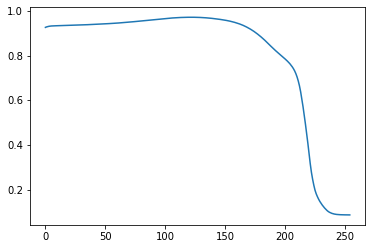

In [18]:
plt.plot(accs_D)

### TO DO - CREATE FUNCTION TO ALTER ARRAYS

-- SEE GALLEGO, utilDataGenerator.py - https://github.com/ajgallego/document-image-binarization/blob/master/binarize/utilDataGenerator.py

In [126]:
img = DIBCO_orig[0]
img

[array([[223, 223, 223, ..., 228, 229, 230],
        [222, 222, 222, ..., 229, 230, 232],
        [223, 223, 223, ..., 229, 229, 230],
        ...,
        [211, 211, 211, ..., 222, 221, 221],
        [212, 212, 212, ..., 221, 220, 220],
        [212, 212, 212, ..., 221, 221, 221]], dtype=uint8),
 array([[207, 206, 206, ..., 217, 217, 216],
        [205, 206, 206, ..., 219, 219, 219],
        [205, 205, 206, ..., 218, 219, 219],
        ...,
        [208, 209, 208, ..., 214, 214, 216],
        [206, 207, 209, ..., 215, 216, 216],
        [206, 207, 209, ..., 215, 216, 216]], dtype=uint8),
 array([[218, 218, 219, ..., 230, 233, 234],
        [218, 218, 218, ..., 231, 233, 234],
        [218, 216, 214, ..., 232, 234, 235],
        ...,
        [215, 215, 214, ..., 232, 231, 231],
        [213, 213, 215, ..., 231, 232, 232],
        [214, 214, 216, ..., 232, 231, 232]], dtype=uint8),
 array([[223, 224, 224, ..., 226, 226, 226],
        [223, 224, 224, ..., 227, 227, 226],
        [223, 22

In [26]:
window_size = 64

In [35]:
img[0:window_size, 0:window_size, ]

array([[218, 218, 219, ..., 216, 219, 220],
       [218, 218, 218, ..., 218, 220, 221],
       [218, 216, 214, ..., 220, 220, 220],
       ...,
       [222, 222, 222, ..., 221, 221, 221],
       [221, 221, 221, ..., 222, 222, 222],
       [221, 221, 220, ..., 223, 222, 222]], dtype=uint8)

In [36]:
img[0:window_size, 0:window_size, ].shape

(64, 64)

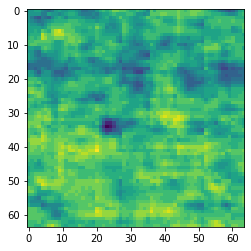

In [37]:
plt.imshow(img[0:window_size, 0:window_size, ])

In [42]:
img.shape

(1064, 2417)

In [71]:
def arr_div(img):

    cont = []
    
    idx_row_start_n = 0
    idx_col_start_n = 0
    
    im_size = img.shape
    n_windows_tall = im_size[0] // window_size
    n_windows_wide = im_size[1] // window_size
    
    for idx_row_start_n in range(n_windows_tall):
    
        for idx_col_start_n in range(n_windows_wide):
            
            window = img[window_size * idx_row_start_n: \
                                     window_size * (idx_row_start_n + 1), 
                window_size * idx_col_start_n: window_size * (idx_col_start_n + 1)]
    
            window = np.divide(window, 255)
        
            cont.append(window)
    
    return cont

In [133]:
X = []

for img in DIBCO_orig:
    
    # CREATES ONE LONG LIST INSTEAD OF SEVERAL LISTS
    X.extend(arr_div(img))

In [135]:
X = np.array(X)

In [137]:
y = []

for img in DIBCO_GT:
    
    # CREATES ONE LONG LIST INSTEAD OF SEVERAL LISTS
    y.extend(arr_div(img))

In [138]:
y = np.array(y)

In [127]:
window = arr_div(img)

AttributeError: 'list' object has no attribute 'shape'

In [73]:
window

[array([[0.85490196, 0.85490196, 0.85882353, ..., 0.84705882, 0.85882353,
         0.8627451 ],
        [0.85490196, 0.85490196, 0.85490196, ..., 0.85490196, 0.8627451 ,
         0.86666667],
        [0.85490196, 0.84705882, 0.83921569, ..., 0.8627451 , 0.8627451 ,
         0.8627451 ],
        ...,
        [0.87058824, 0.87058824, 0.87058824, ..., 0.86666667, 0.86666667,
         0.86666667],
        [0.86666667, 0.86666667, 0.86666667, ..., 0.87058824, 0.87058824,
         0.87058824],
        [0.86666667, 0.86666667, 0.8627451 , ..., 0.8745098 , 0.87058824,
         0.87058824]]),
 array([[0.8627451 , 0.8627451 , 0.85882353, ..., 0.85882353, 0.85882353,
         0.85882353],
        [0.86666667, 0.8627451 , 0.85490196, ..., 0.8627451 , 0.8627451 ,
         0.8627451 ],
        [0.8627451 , 0.86666667, 0.8627451 , ..., 0.87058824, 0.86666667,
         0.8627451 ],
        ...,
        [0.8627451 , 0.85882353, 0.85882353, ..., 0.86666667, 0.87058824,
         0.87058824],
        [0.8

In [74]:
len(cont)

592

In [75]:
img_GT = DIBCO_GT[2]

In [76]:
arr_div(img_GT)

[array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 arr

In [85]:
len(X)

592

In [86]:
X[0].shape

(64, 64)

In [140]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape = (window_size, window_size, 1)),
        tf.keras.layers.Conv2D(32, 
                               kernel_size=(3, 3),
                               strides = 1,
                               padding = 'same'),
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(32, 
                               kernel_size=(3, 3),
                               strides = 1,
                               padding = 'same'),
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(32, 
                               kernel_size=(3, 3),
                               strides = 1,
                               padding = 'same'),                       
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'),      
        tf.keras.layers.Conv2DTranspose(32, 
                               kernel_size=(3, 3),
                               strides = 1,
                               padding = 'same'),
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'),                       
        tf.keras.layers.Conv2DTranspose(32, 
                               kernel_size=(3, 3),
                               strides = 1,
                               padding = 'same'),
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'), 
        tf.keras.layers.Conv2DTranspose(32, 
                               kernel_size=(3, 3),
                               strides = 1,
                               padding = 'same'),
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'), 
        tf.keras.layers.Conv2D(1, 
                               kernel_size=(3, 3), 
                               strides=1, 
                               padding='same', 
                               activation='sigmoid')                     
    ]
)

model.summary()

model.compile('rmsprop', 
              'binary_crossentropy')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 batch_normalization_12 (Bat  (None, 64, 64, 32)       256       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 64, 64, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 64, 64, 32)       256       
 chNormalization)                                                
                                                                 
 activation_13 (Activation)  (None, 64, 64, 32)       

In [141]:
model.fit(X, y,
          epochs = 10)

Epoch 1/10
94/94 [==============================] - 88s 923ms/step - loss: 0.1118
Epoch 2/10
94/94 [==============================] - 84s 888ms/step - loss: 0.0615
Epoch 3/10
94/94 [==============================] - 84s 893ms/step - loss: 0.0444
Epoch 4/10
94/94 [==============================] - 84s 896ms/step - loss: 0.0399
Epoch 5/10
94/94 [==============================] - 84s 897ms/step - loss: 0.0363
Epoch 6/10
 1/94 [..............................] - ETA: 1:32 - loss: 0.0588

KeyboardInterrupt: 

In [142]:
predictions = model.predict(X)

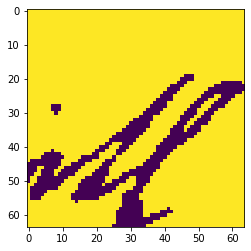

In [143]:
plt.imshow(y[- 1])

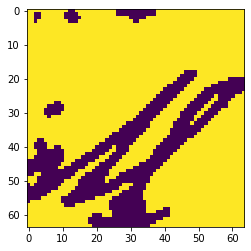

In [145]:
plt.imshow(predictions[- 1] > 0.5)

In [146]:
predictions.max()

0.99999976

In [147]:
predictions.min()

2.134562e-06

### TO DO - TRY f1 SCORE

#### USING BENTHAM DATA

In [22]:
len(DIBCO_orig)

10

In [23]:
len(DIBCO_GT)

10

In [20]:
len(Ben_orig)

433

In [21]:
len(Ben_GT)

11473

In [19]:
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(Ben_orig,
                                                            Ben_GT,
                                                            train_size = 0.75,
                                                            test_size = 0.25,
                                                            random_state = 321)

ValueError: Found input variables with inconsistent numbers of samples: [433, 11473]

In [ ]:
def thresh_acc_B(thresh):
   
    accuracies_Ben = []

    for ground_truth, original in zip(y_train_B, X_train_B):
        
        # KEEPS THE SECOND ELEMENT OF A TUPLE
        _, predicted = cv2.threshold(original,
                                     thresh, 255, 
                                     cv2.THRESH_BINARY)
        
        # COMPUTE ACCURACY SCORES ACROSS TRAINING DATA
        accuracies_Ben.append(accuracy_score(ground_truth.flatten(),
                                         predicted.flatten()))
    
    # AVERAGE ACCURACY SCORES
    return np.mean(accuracies_Ben) 

In [ ]:
thresh_acc_B(160)

In [ ]:
accs_B = []

for thresh in range(0, 255):
    
    accs_B.append(thresh_acc_B(thresh))

In [ ]:
np.asarray(accs_B).argmax()

In [ ]:
plt.plot(accs_B)

## STEP 4) PREDICTIONS AND ACCURACY METRICS

In [ ]:
y_pred = np.argmax(ker_test.predict(X_test),
                   axis = 1)

In [ ]:
print(classification_report(y_test, 
                            y_pred))

## THEN STEP 5) FINISH TWEAKING PRE-PROCESSING & RE-ITERATE

#### (e.g. USE GAUSSIAN BLUR?  WHICH DE-NOISING, AND AFTER vs BEFORE, IMAGE SEGMENTATION, etc.)